In [21]:
{-# LANGUAGE NoMonomorphismRestriction FlexibleContexts TypeFamilies #-}
:opt no-lint
import Diagrams.Backend.Cairo.CmdLine

In [22]:
import Data.List.Split
import Data.Maybe
import Diagrams.BoundingBox
import Diagrams.Prelude
import Graphics.SVGFonts
import Graphics.SVGFonts.ReadFont (PreparedFont)

The diagram is the boxes (the "cube") and the lines between the boxes.



In [23]:
example = do
  font <- lin2
  let c = sCube font
  return $ pad 1.1 . centerXY $ c <> drawLines c <> square 30
                                # fc whitesmoke
                                # scaleY 0.94
                                # translateX 11
                                # translateY (-3)

A "box" is a diagram (the "innards") surrounded by a rounded
rectangle.  First the innards are padded by a fixed amount, then we
compute its height and width -- that's the size of the surrounding
rectangle.



In [24]:
box innards padding =
    let padded =                  strutY padding
                                       ===
             (strutX padding ||| centerXY innards ||| strutX padding)
                                       ===
                                  strutY padding
        height = diameter (r2 (0,1)) padded
        width  = diameter (r2 (1,0)) padded
    in centerXY innards <> roundedRect width height 0.1

textOpts font n = TextOpts font INSIDE_H KERN False 1 n

A single string of text.



In [25]:
text' :: PreparedFont Double -> String -> Double -> Diagram B
text' font s n = textSVG_ (textOpts font n) s # fc white # lw none

Several lines of text stacked vertically.



In [26]:
centredText font ls n = vcat' (with & catMethod .~ Distrib & sep .~ n)
                     (map (\l -> centerX (text' font l n)) ls)
centredText' font s = centredText font (splitOn "\n" s)

Diagram-specific parameters, including the positioning vectors.



In [27]:
padAmount = 0.5

down = r2 (0, -10)

upright = r2 (7, 5)

right = r2 (15, 0)

A box with some interior text and a name.



In [28]:
mybox font s n = (box (centredText' font s 1) padAmount) # named n

The cube is just several boxes superimposed, positioned by adding
together some positioning vectors.



In [29]:
sCube :: PreparedFont Double -> Diagram B
sCube font = fc navy $ mconcat
  [ mybox font "Permutation" "perm"
  , mybox font "Permutation\ngroup" "permgroup"                     # translate right
  , mybox font "Symmetry" "sym"                                     # translate upright
  , mybox font "Parameterised\npermutation" "paramperm"             # translate down
  , mybox font "Parameterised\npermutation\ngroup" "parampermgroup" # translate (right ^+^ down)
  , mybox font "Parameterised\nsymmetry" "paramsym"                 # translate (down ^+^ upright)
  , mybox font "Symmetry\ngroup" "symgroup"                         # translate (upright ^+^ right)
  , mybox font "Parameterised\nsymmetry\ngroup" "paramsymgroup"     # translate (down ^+^ right ^+^ upright)
               ]


For each pair (a,b) of names, draw an arrow from diagram "a" to
diagram "b".



In [30]:
drawLines :: Diagram B -> Diagram B
drawLines cube = foldr (.) id (map (uncurry
                       (connectOutside' (with
                       & headLength .~ small
                       & shaftStyle %~ lw thin))) pairs) cube
  where pairs = [ ("perm","permgroup")
                , ("perm","sym")
                , ("perm","paramperm")
                , ("paramperm","paramsym")
                , ("sym","symgroup")
                , ("paramsym","paramsymgroup")
                , ("permgroup","symgroup")
                , ("paramperm","parampermgroup")
                , ("symgroup","paramsymgroup")
                , ("sym","paramsym")
                , ("permgroup","parampermgroup")
                , ("parampermgroup","paramsymgroup")
                ]

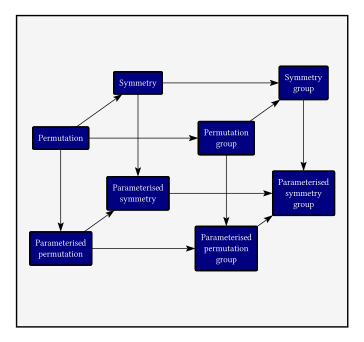

In [31]:
example